# 数据处理专用
整合数据,包含了所有处理的数据,用于对联合分布进行探索性分析和错误排查
000985.SH为沪深全A

In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.colors import BoundaryNorm

# 自行编写的包
sys.path.append('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment')
sys.path.append('/usr/local/stata17/utilities')

# Stata
from pystata import config

config.init('mp')


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 8-core , expiring  1 Jan 2025
Serial number: 501709301094
  Licensed to: Colin's Stata 17 MP
               Love you

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


## 金融市场情绪 - 时间序列

In [2]:
df_finmarket = pd.read_parquet('/home/ubuntu/notebooks/DataSets/investor_sentiment/FIN_SENT_STATA_2010_2021.parquet')
df_finmarket

,trade_date,trade_year,CEFD,RIPO,NIPO,TURN,TURN_MA,trade_month,SR,lnPD,...,NIPO_R,RIPO_R,SR_R,l1_TURN_R,lnPD_R,SENT_INDEX_R,SENT_INDEX_EX,SENT_INDEX_DEX,SENT_INDEX_R_EX,SENT_INDEX_R_DEX
1,20100105,2010,-17.840000,0.000000,0.0,0.00819,-0.005408,201001,32.76,-0.3186,...,-0.930690,-0.277455,16.537449,0.000834,-0.100608,-1.244143,-0.430662,-0.285413,-0.331016,0.058454
2,20100106,2010,-17.720000,0.617127,3.0,0.00802,-0.005580,201001,32.76,-0.3186,...,2.069310,0.339671,16.537449,0.001924,-0.100608,-0.035316,-0.489220,-0.286190,-0.412211,0.055876
3,20100107,2010,-16.870000,0.058932,1.0,0.00834,-0.005263,201001,32.76,-0.3186,...,0.069310,-0.218523,16.537449,0.001754,-0.100608,-0.860132,-0.450119,-0.287520,-0.378698,0.051982
4,20100108,2010,-17.595926,0.319774,6.0,0.00643,-0.007174,201001,32.76,-0.3186,...,5.069310,0.042319,16.537449,0.002074,-0.100608,0.640860,-0.478187,-0.287617,-0.421506,0.049377
5,20100111,2010,-16.700000,0.000000,0.0,0.00875,-0.004857,201001,32.76,-0.3186,...,-0.930690,-0.277455,16.537449,0.000164,-0.100608,-1.183935,-0.387898,-0.288697,-0.327042,0.044932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,20211227,2021,-2.258667,0.079280,1.0,0.00675,0.001142,202112,6.95,-0.0318,...,-0.044895,-0.374305,-2.832969,0.001832,0.097983,0.390557,1.170102,1.302731,0.960139,1.050876
2913,20211228,2021,-2.880625,0.107463,4.0,0.00647,0.000860,202112,6.95,-0.0318,...,2.955105,-0.346122,-2.832969,0.000582,0.097983,1.186737,1.127746,1.298598,0.909492,1.046500
2914,20211229,2021,-2.787500,0.000000,0.0,0.00624,0.000628,202112,6.95,-0.0318,...,-1.044895,-0.453585,-2.832969,0.000302,0.097983,0.013389,1.149856,1.293518,0.934144,1.040757
2915,20211230,2021,-3.135625,0.259762,3.0,0.00627,0.000655,202112,6.95,-0.0318,...,1.955105,-0.193822,-2.832969,0.000072,0.097983,0.972127,1.079838,1.288670,0.852272,1.035358


## 分析师情绪 - 面板

In [3]:
df_analyst = pd.read_parquet('/home/ubuntu/notebooks/DataSets/investor_sentiment/ANALYST_SENT_STATA_2014_2021.parquet').astype(
        dtype={'trade_date': 'uint32'})
df_analyst

,trade_date,ts_code,CON_YEAR,CON_OR,CON_NP,CON_EPS,CON_NA,CON_PB,CON_PS,CON_PE,...,close_l1,close_chg,img_neg,tex_neg,riskfree_return,opt_profit_yoy,opt_pe,opt_profit,time,close_chg_s
0,20140102,000010.SH,2014,1.229380e+09,20139.051805,0.8059,1.356969e+09,1.0078,0.7662,6.7909,...,5040.2700,-0.599174,0.0,0.0,0.015460,106.321095,-36.175752,6.534466,1.0,0.359010
1,20140102,000015.SH,2014,5.889377e+08,15328.983195,0.8057,9.912300e+08,0.8505,0.8438,5.4999,...,1681.4600,-0.397274,0.0,0.0,0.015460,19.072326,-30.115629,4.676568,1.0,0.157826
2,20140102,000016.SH,2014,8.063073e+08,13294.314326,0.8620,8.877149e+08,0.9876,0.7290,6.5949,...,1574.7800,-0.868693,0.0,0.0,0.015460,131.053412,-32.636364,6.312925,1.0,0.754627
3,20140102,000300.SH,2014,1.553438e+09,22802.196329,0.7898,1.569081e+09,1.0997,0.7828,7.5674,...,2330.0300,-0.345489,0.0,0.0,0.015460,76.005909,-36.833055,7.697893,1.0,0.119363
4,20140102,000903.SH,2014,1.219844e+09,20305.917391,0.8299,1.353838e+09,0.9884,0.7627,6.5896,...,2155.2300,-0.593904,0.0,0.0,0.015460,80.367172,-35.141732,6.049136,1.0,0.352722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,20221028,000906.SH,2022,5.610430e+09,51796.277367,0.9641,4.774941e+09,1.1471,0.9763,10.5749,...,4024.5400,-2.622412,NaN,NaN,0.004842,203.012356,-18.087529,40.330525,2146.0,6.877042
23561,20221028,000985.SH,2022,7.224144e+09,58403.840993,0.7555,5.825681e+09,1.3191,1.0637,13.1574,...,4640.7167,-2.964490,NaN,NaN,0.004842,241.903541,-22.694477,36.381384,2141.0,8.788203
23562,20221028,399005.SZ,2022,3.308684e+08,3156.638702,0.9635,2.227230e+08,2.8926,1.9471,20.4090,...,7293.5300,-3.140318,NaN,NaN,0.004842,83.540859,-23.129944,50.151677,2144.0,9.861594
23563,20221028,399006.SZ,2022,1.580034e+08,1800.383211,1.3799,1.220097e+08,4.4799,3.4594,30.3598,...,2337.2500,-3.711199,NaN,NaN,0.004842,8845.061854,-24.327517,52.148060,2144.0,13.772998


## 投资者情绪 - 时间序列

In [4]:
df_forum_tdate = pd.read_parquet('/home/ubuntu/notebooks/DataSets/investor_sentiment/FORUM_SENT_TDATE_CSMAR.parquet').reset_index()
df_forum_tdate = df_forum_tdate.fillna(0)
df_forum_tdate

,trade_date,IndexA,IndexB,Posts,Readings,Comments,ThumbUps,PosPosts,NeuPosts,NegPosts,PosRatio,NeuRatio,NegRatio
0,20140102,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,20140103,0.000000,0.000000,2.0,107379.0,342.0,2.0,1.0,0.0,1.0,0.500000,0.000000,0.500000
2,20140106,0.000000,0.000000,2.0,22652.0,47.0,0.0,1.0,0.0,1.0,0.500000,0.000000,0.500000
3,20140107,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,20140108,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,20211012,-0.229368,-0.467035,120497.0,26442508.27,273224.2,172338.87,42169.0,11057.0,67271.0,0.349959,0.091762,0.558279
1892,20211013,-0.226023,-0.459981,123178.0,27651587.71,288526.17,177561.46,43256.0,11402.0,68520.0,0.351167,0.092565,0.556268
1893,20211014,-0.188129,-0.380788,135718.0,30212375.19,303991.93,188185.02,50036.0,12457.0,73225.0,0.368676,0.091786,0.539538
1894,20211015,-0.268408,-0.550281,96804.0,19564087.44,218796.43,121423.77,32133.0,8960.0,55711.0,0.331939,0.092558,0.575503


## 媒体情绪 - 时间序列

## 构建合并的数据

In [5]:
df_merge = (pd.merge(df_analyst, df_finmarket.drop(columns=['trade_year']), on='trade_date', how='right'))
df_merge = pd.merge(df_merge, df_forum_tdate, on='trade_date', how='left')
df_merge

,trade_date,ts_code,CON_YEAR,CON_OR,CON_NP,CON_EPS,CON_NA,CON_PB,CON_PS,CON_PE,...,Posts,Readings,Comments,ThumbUps,PosPosts,NeuPosts,NegPosts,PosRatio,NeuRatio,NegRatio
0,20100105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
1,20100106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
2,20100107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
3,20100108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
4,20100111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22359,20211231,000906.SH,2021.0,4.951278e+09,47259.658498,0.8905,4.271503e+09,1.5753,1.3590,14.2378,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
22360,20211231,000985.SH,2021.0,6.389440e+09,53655.694957,0.7111,5.237010e+09,1.7997,1.4751,17.5661,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
22361,20211231,399005.SZ,2021.0,2.653902e+08,2509.326960,0.7512,2.053548e+08,4.1858,3.2389,34.2554,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
22362,20211231,399006.SZ,2021.0,1.119425e+08,1353.545015,1.0905,9.921329e+07,7.8148,6.9262,57.2816,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#000985.SH 399310.SZ 000300.SH
df_merge = df_merge.query("ts_code=='000985.SH'").astype(dtype={'trade_date': 'str'})
df_merge.to_csv('/home/ubuntu/notebooks/DataSets/investor_sentiment/FINAL_DATA_2014_2021.csv')
df_merge

,trade_date,ts_code,CON_YEAR,CON_OR,CON_NP,CON_EPS,CON_NA,CON_PB,CON_PS,CON_PE,...,Posts,Readings,Comments,ThumbUps,PosPosts,NeuPosts,NegPosts,PosRatio,NeuRatio,NegRatio
973,20140102,000985.SH,2014.0,3.034892e+09,27421.678403,0.6857,2.017385e+09,1.3334,0.8863,9.8095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984,20140103,000985.SH,2014.0,3.033876e+09,27421.601209,0.6857,2.017584e+09,1.3213,0.8787,9.7214,...,2.0,107379.0,342.0,2.0,1.0,0.0,1.0,0.5,0.0,0.5
995,20140106,000985.SH,2014.0,3.033345e+09,27412.012060,0.6854,2.027389e+09,1.2895,0.8619,9.5373,...,2.0,22652.0,47.0,0.0,1.0,0.0,1.0,0.5,0.0,0.5
1006,20140107,000985.SH,2014.0,3.028546e+09,27384.608096,0.6846,2.027386e+09,1.2917,0.8647,9.5629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,20140108,000985.SH,2014.0,3.028892e+09,27355.547003,0.6838,2.028490e+09,1.2935,0.8663,9.5920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22316,20211227,000985.SH,2021.0,6.389869e+09,53799.927579,0.7131,5.236956e+09,1.7835,1.4617,17.3613,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
22327,20211228,000985.SH,2021.0,6.391559e+09,53788.880275,0.7129,5.237495e+09,1.7933,1.4695,17.4615,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
22338,20211229,000985.SH,2021.0,6.389955e+09,53725.674838,0.7120,5.237052e+09,1.7779,1.4571,17.3305,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
22349,20211230,000985.SH,2021.0,6.390729e+09,53695.625032,0.7116,5.236812e+09,1.7905,1.4672,17.4624,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_merge.dtypes

trade_date     object
ts_code        object
CON_YEAR      float64
CON_OR        float64
CON_NP        float64
               ...   
NeuPosts      float64
NegPosts      float64
PosRatio      float64
NeuRatio      float64
NegRatio      float64
Length: 82, dtype: object

In [8]:
# @formatter:off

# 指标对比分析

## 相关矩阵

In [9]:
%%stata -d df -force
/*{*/

//清除估计结果
est clear

//生成时间变量 (已排序)
ge date=_n
tsset date

//定义待对比的指标
local independent_vars "close_chg img_neg tex_neg SENT_INDEX_EX SENT_INDEX_R_EX opt_profit IndexA IndexB"
pwcorr `independent_vars', sig
mat p_values = r(sig)
esttab mat(p_values)  using pycharm_projects/Investor-Sentiment/outputs/sentindex_pwcorr,r nomtitle type
/*}*/

NameError: name 'df' is not defined

In [ ]:
df_corr=pd.read_csv('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/outputs/sentindex_pwcorr.csv').replace({'=': '', '"': '',}, regex=True)
df_corr=df_corr.drop(df_corr.columns[0], axis=1)
df_corr = df_corr.applymap(lambda x: re.sub(r'^\.$', '1', str(x)))
df_corr.astype('float64').to_csv('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/outputs/sentindex_pwcorr_t.csv')

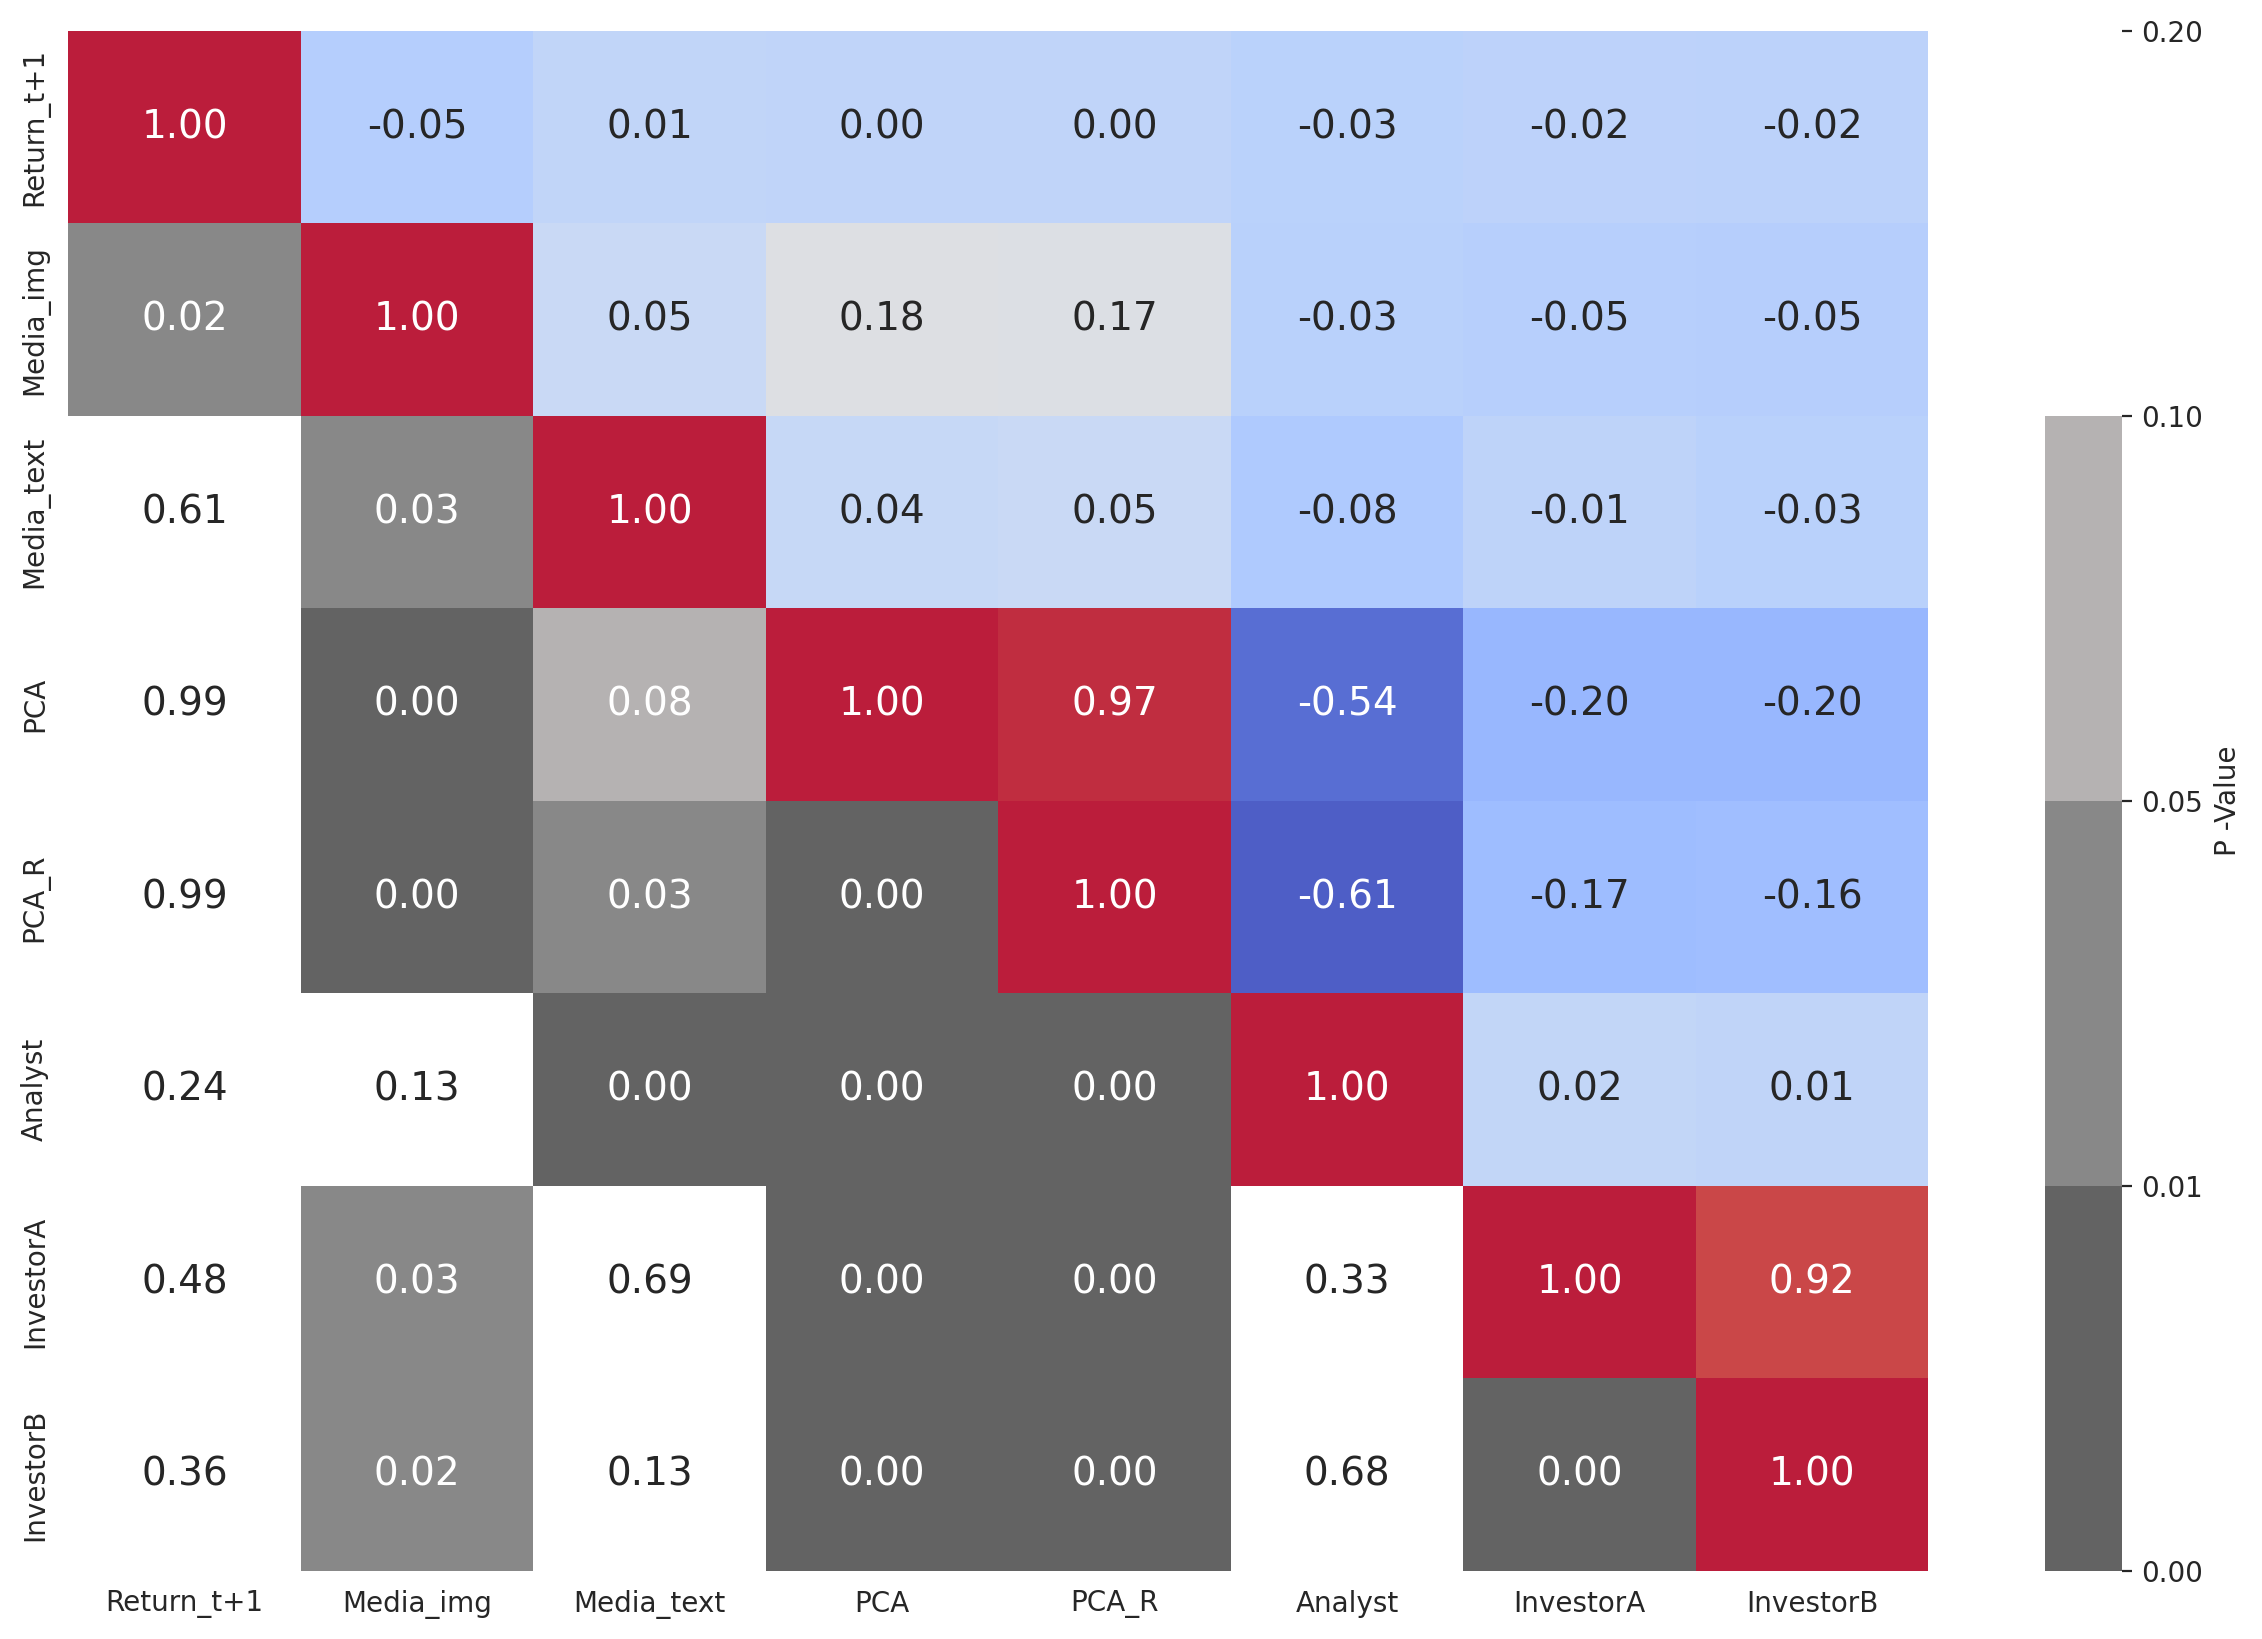

In [16]:
df=df_merge[['close_chg', 'img_neg', 'tex_neg', 'SENT_INDEX_EX', 'SENT_INDEX_R_EX', 'opt_profit', 'IndexA', 'IndexB']].copy()
df['close_chg']=df['close_chg'].shift(-1)
df.rename(columns={'close_chg': 'Return_t+1','img_neg':'Media_img','tex_neg':'Media_text','SENT_INDEX_EX':'PCA','SENT_INDEX_R_EX':'PCA_R','opt_profit':'Analyst','IndexA':'InvestorA','IndexB':'InvestorB'}, inplace=True)

# 计算相关系数矩阵
corr_matrix = df.corr().copy()


# 显著性矩阵
p_values=pd.read_csv('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/outputs/sentindex_pwcorr_t.csv').drop(columns=['Unnamed: 0']).to_numpy()

# 将下三角矩阵的元素替换为NaN
p_values = np.tril(p_values, k=-1)
p_values[p_values == 0] = np.nan
p_values[7][6]=0 #有一个特殊的
p_values[4][3]=0 #有一个特殊的

# 将p值矩阵转换为数据框
p_values = pd.DataFrame(p_values, index=corr_matrix.index, columns=corr_matrix.columns)

# 定义颜色映射和范围
colors = ['#525252','#7B7B7B','#ADAAAA','#FFFFFF',]
bounds = [0 , 0.01, 0.05 ,0.1,0.2]
cmap = sns.color_palette(colors, n_colors=len(bounds)-1)
norm = BoundaryNorm(bounds, len(bounds)-1)

# 设置图像大小和dpi
plt.figure(figsize=(15, 10), dpi=200)

# 绘制热力图
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=p_values.notnull(), alpha=0.9 ,cbar=False,cbar_kws={"label": "Person"},annot_kws={"fontsize":14})
sns.heatmap(p_values, annot=True, fmt='.2f', cmap=cmap, norm=norm,mask=p_values.isnull(), alpha=0.9 ,cbar=True,cbar_kws={"label": "P -Value"},annot_kws={"fontsize":14})
plt.show()

## 样本外预测

In [ ]:
%%stata -d df_merge -force
/*{*/
//清除估计结果
est clear

//生成时间变量 (已排序)
ge date=_n
tsset date

// 划分训练集和测试集
ge byte in_train = (date < 1944*0.8)
ge byte in_test = (date >= 1944*0.8)

//计算测试集中因变量的均值
egen mean_close_chg = mean(close_chg) if in_test

//计算实际值与均值之间的平方差异的总和
egen sum_sq_diff_mean = total((close_chg - mean_close_chg)^2) if in_test

//计算基准模型预测误差
ge error_benchmark = close_chg - mean_close_chg if in_test

//定义待对比的指标
local independent_vars "img_neg tex_neg SENT_INDEX_EX SENT_INDEX_R_EX opt_profit IndexA IndexB"

//循环
foreach var of local independent_vars{

        //1.样本外OOS R2

        //使用训练集进行线性回归建模 滞后1期
        eststo `var': reg close_chg l.`var' if in_train
        scalar coef = e(b)[1, 1]
        estadd scalar coef
        scalar tstat = e(b)[1, 1]/(sqrt(e(V)[1, 1]))
        estadd scalar tstat

        //进行样本外预测,线性预测值
        predict pred_`var' if in_test

        //计算MSPE
        egen mspe_`var' = mean((close_chg - pred_`var')^2) if in_test /*{*/
        qui sum mspe_`var' if in_test
        scalar mspe = r(mean)
        estadd scalar mspe

        //计算实际值与预测值之间的平方差异的总和
        egen sum_sq_diff_pred_`var' = total((close_chg - pred_`var')^2) if in_test

        //计算样本外 R-squared (OOS R2)
        ge oos_r2_`var' = 1 - (sum_sq_diff_pred_`var' / sum_sq_diff_mean) if in_test
        qui sum oos_r2_`var' if in_test
        scalar oos_r2 = r(mean)
        estadd scalar oos_r2

        //2.CW测试

        // 计算预测误差
        ge error_`var' = close_chg - pred_`var' if in_test

        //计算误差差值(Error differences)
        ge error_diff_`var' = error_`var'^2 - error_benchmark^2 if in_test

        //使用误差差值执行线性回归
        reg error_diff_`var' l.error_diff_`var' if in_test

}


显示结果

In [ ]:
%%stata
ereturn list
esttab ,star(* 0.1 ** 0.05 *** 0.01)  scalars(coef tstat r2 mspe oos_r2)
mat R = r(stats)'
esttab mat(R) using pycharm_projects/Investor-Sentiment/outputs/sentindex_compare.rtf,r nomtitle


In [ ]:
# DATAFRAME[[i for i in DATAFRAME.columns if i.startswith('oos_r2') or i.startswith('mspe')]]